## Contour Detection:
Contours are outlines of objects. In image processing, the line that connects the points with the same intensity and color along the boundary of an object is considered the contour. It may sound similar to **edge detection**. Although both techniques are used to determine the structural outlines of objects, **edge detection** may or may not form a closed boundary, whereas **contour detection** finds a closed object and draws its boundary. Contour detection is very useful in shape analysis, object detection and recognition.

In this tutorial, we will work on a little project to learn how to apply contour detection. Let's say our stakeholder is a Swiss cheese manufacturer who is worried about the quality of their products. The higher quality cheese is the one that has been aged well, meaning the bacteria will have had more time to carve out more holes. The manufacturer would like for us to count the holes in slices of cheeses to keep their products up to a certain standard.

To find the contours we will follow these steps:
- Turn the image to grayscale and denoise it.
- Obtain the binary image so the holes in the cheese are white and the background is black.
- Use find_contours() function to find contours and display the number of holes.
- Display the contours on the grayscale image.

We will apply these steps to find the number of holes, then we will double check our answer with another technique that we learned in **Connected Component Analysis** part of this tutorial.

Let's load the libraries and an image of a slice of cheese:

In [1]:
#Importing necesary libraries
import skimage
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.measure import find_contours

(-0.5, 611.5, 611.5, -0.5)

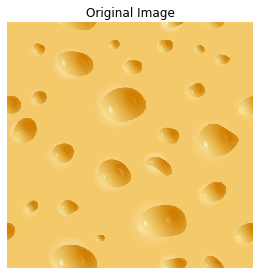

In [2]:
#Load the image
image = skimage.io.imread('cheese.jpg')
io.imshow(image)
plt.title('Original Image')
plt.axis('off')

Text(0.5, 1.0, 'Grayscale Denoised Image')

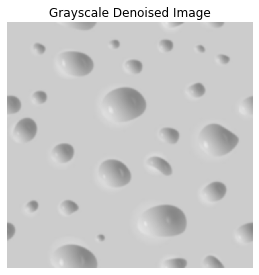

In [3]:
#Produce the grayscale image
gray_image = rgb2gray(image)
#Denoise the image
denoised_image = gaussian(gray_image, sigma=2)
io.imshow(denoised_image)
plt.axis('off')
plt.title('Grayscale Denoised Image')

Now, we will use Otsu's method to find the threshold and create the binary image:

Text(0.5, 1.0, 'Binary Image')

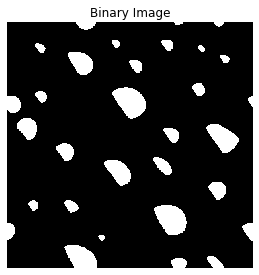

In [4]:
#Find Otsu threshold 
thresh = threshold_otsu(denoised_image)
binary_image = denoised_image < thresh
#Create a mask for the binary image where holes are 
# white (1) and the rest is black (0)
binary = np.zeros(shape=binary_image.shape)
binary[binary_image] = 1
io.imshow(binary)
plt.axis('off')
plt.title('Binary Image')

In [5]:
#Find contours of the holes:
contours = find_contours(binary, level=0.8)
print('{} holes were detected in this slice of cheese.'.format(len(contours)))

31 holes were detected in this slice of cheese.


Text(0.5, 1.0, 'Grayscale Image with Detected Contours')

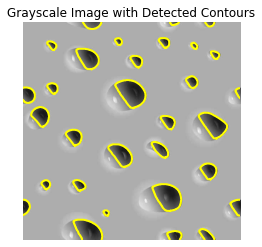

In [6]:
#For each hole, plot the contour
for contour in contours:
    plt.plot(contour[:,1], contour[:,0], linewidth=2, color='yellow')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image with Detected Contours')

Let's double check our answer by using label() function from skimage.measure:

In [7]:
from skimage.measure import label
labs, count = skimage.measure.label(binary, return_num=True)
print('{} holes were found in this slice of cheese.'.format(count))

31 holes were found in this slice of cheese.


So, both techniques and visually counting the holes tell us that there are 31 holes. 

This process may look excessive just to find a small number of holes in one slice of cheese, but when we have sample slices coming from thousands of cheese blocks with hundreds of holes in them, we would rather employ this process than having human involvement.